In [85]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from functools import reduce

In [86]:
goods = pd.read_csv('goods.csv')
goods

good_id     good_name  category sale
0       11  applications  medicine  yes
1       12     fantastic  medicine  yes
2       13       plastic      food   no
3       14          lime  medicine   no
4       15      navigate      food   no
5       16      back-end  medicine  yes
6       17        wooden  internet   no
7       18     associate  internet   no
8       19    withdrawal  building  yes

In [87]:
prices = pd.read_csv('prices.csv')
prices

good_id  price
0       11   1300
1       12    250
2       13     45
3       14   1234
4       15   1410
5       16    467
6       17    123
7       18    455
8       19    900

In [88]:
sales1 = pd.read_csv('sales1.csv')
sales2 = pd.read_csv('sales2.csv')
sales = pd.concat([sales1, sales2], ignore_index=True).sort_values(by=['good_id', 'count']).reset_index(drop=True).groupby('good_id', as_index=False).sum()
sales

good_id  count
0       11    143
1       12     14
2       13     35
3       14     74
4       15     36
5       16     15
6       17     25
7       18     26

In [89]:
df_final = reduce(lambda left,right: pd.merge(left,right, on='good_id', how='left'), [goods, prices, sales]).fillna(0)
df_final['price'] = df_final['price'].where(df_final['sale'] == 'no', df_final['price']/2)
df_final['saled'] = df_final['price']*df_final['count']
df_final

good_id     good_name  category sale   price  count    saled
0       11  applications  medicine  yes   650.0  143.0  92950.0
1       12     fantastic  medicine  yes   125.0   14.0   1750.0
2       13       plastic      food   no    45.0   35.0   1575.0
3       14          lime  medicine   no  1234.0   74.0  91316.0
4       15      navigate      food   no  1410.0   36.0  50760.0
5       16      back-end  medicine  yes   233.5   15.0   3502.5
6       17        wooden  internet   no   123.0   25.0   3075.0
7       18     associate  internet   no   455.0   26.0  11830.0
8       19    withdrawal  building  yes   450.0    0.0      0.0

## Task 1
1. Отримати у категорiї ПРОДАНИХ товарiв, яку вибирати з випадаючого списку, для кожної назви виручену суму у форматi < назва товару - сума >.

In [90]:
def task1(good):
    print('<', good, '-', df_final['saled'][df_final['good_name'] == good].item(), '>')

interact(task1, good=list(df_final['good_name'][df_final['count'] > 0]));

interactive(children=(Dropdown(description='good', options=('applications', 'fantastic', 'plastic', 'lime', 'n…

## Task 2
2. Отримати для кожної категорiї ПРОДАНИХ товарiв виручену сумуу форматi < категорiя - сума >.

In [109]:
saled = df_final.groupby('category',as_index=False).sum().sort_values(by='saled', ascending=False).reset_index(drop=True)[['category', 'saled']]
saled

category     saled
0  medicine  189518.5
1      food   52335.0
2  internet   14905.0
3  building       0.0

2а. Побудувати дiаграму виручених сум по категорiях.

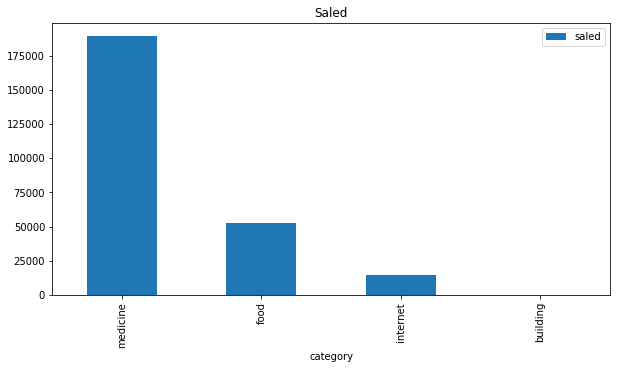

In [113]:
saled.plot(x='category', y='saled', kind='bar', title='Saled', figsize=(10, 5));

## Task 3
3. Отримати у кожнiй категорiї ПРОДАНИХ товарiв назви товарiв знайбiльшою вирученою сумою у форматi < назва товару - сума >.

In [125]:
df_final.groupby(['category', 'good_name'], sort=False, as_index=False)['saled'].max().drop_duplicates(subset=['category'])

category     good_name    saled
0  medicine  applications  92950.0
2      food       plastic   1575.0
6  internet        wooden   3075.0
8  building    withdrawal      0.0

## Task 4
4. У категорiї ПРОДАНИХ товарiв, яку вибирати з випадаючого списку,для кожного з проданих товарiв акцiйної групи отримати кiлькiсть продажта виручену суму.

In [160]:
def task4(group):
    print(df_final[['count', 'saled']][df_final['category'] == group].sum())

interact(task4, group=list(set(df_final['category'][df_final['sale'] == 'yes'])));

interactive(children=(Dropdown(description='group', options=('building', 'medicine'), value='building'), Outpu…

## Task 5
5. Отримати загальну суму ПРОДАНИХ товарiв.

In [133]:
df_final['saled'].sum()

256758.5

# Task 6
6. Отримати перелiк товарiв для кожної категорiї, якi не продавалися.

In [151]:
df_final[['category', 'good_name']][df_final['count'] == 0].sort_values(by=['category'])

category   good_name
8  building  withdrawal